
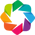

In [1]:
# import libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)

import scipy.stats as ss
import holoviews as hv
hv.extension('bokeh','matplotlib')
%opts Curve Scatter Bars [tools=['hover']]

import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style("whitegrid")
color = sns.color_palette()

In [2]:
df= pd.read_csv("Adsk_dataset_clean.csv")

C:\Users\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head().transpose()

0  \
order_source                                                                           BIC   
order_number                                                                        128142   
order_date                                                                      2016-08-08   
order_type                                                                 New Acquisition   
fiscal_quarter_and_year                                                            2017 Q3   
promo_type                               NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...   
promo_type_code                                                                    UNKNOWN   
bmt_product_group                                                                LT Family   
bmt_offer_type_summary                                                        Product Subs   
bmt_offer_type_group                                                      Product Subs New   
bmt_market                                                                          Mature   
bmt_channel                                                                         eStore   
bmt_billing_term                                                                    3 Year   
bmt_offer_type_subgroup                                                Product Subs New SU   
srp_billed_usd                                                                         970   
total_billed_usd                                                                       485   
total_billed_net_p4p_incentives_usd                                                    485   
srp_billed_ccf                                                                         970   
total_billed_ccf                                                                       485   
total_billed_net_p4p_ccf_incentives                                                    485   
sf_subscription_seats_billed                                                             1   
string                                                                                 GFP   
agreement_number                                                              110001350550   
agreement_status                                                                    Active   
agreement_start_date                                                            2016-08-08   
agreement_end_date                                                              2099-12-31   
billing_behavior                                                                 Recurring   
deployment                                                                      Standalone   
channel_partner_csn                                                            5.12381e+09   
channel_partner_uuid                                  6BAD3F40-D2DD-4779-A944-AACE7D9DA38A   
channel_partner_duns                                                           6.97013e+07   
channel_partner_type                                                           Distributor   
renewal_rate                                                                     0.0115533   
owner_account_csn                                                              5.12755e+09   
owner_type                                                                         ACCOUNT   
owner_account_uuid                                    5626311A-329B-46e5-BAB5-E6D7CA121027   
owner_account_duns                                                             6.15085e+08   
parent_account_csn                                                             5.09012e+09   
self_parented                                                                            N   
parent_account_uuid                                                            S5090120734   
parent_account_duns                                                            6.15085e+08   
account_type_name                                                             End Customer   
named_account_flg                              

# Onboarding Score & Segmentation

In [4]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['month_year'] = df.order_date.dt.to_period('M')
df['month_since_agreement_start']=df['car_days_used_since_agreement_start']/30



In [5]:
print ('Average Onboarding Score is ',df["onboarding_score"].mean())

Average Onboarding Score is  43.0215217667447


In [6]:
%%opts Distribution [width=600 height=400]

hv.Distribution(df, 'onboarding_score')

:Distribution   [onboarding_score]   (Density)

### by Channel

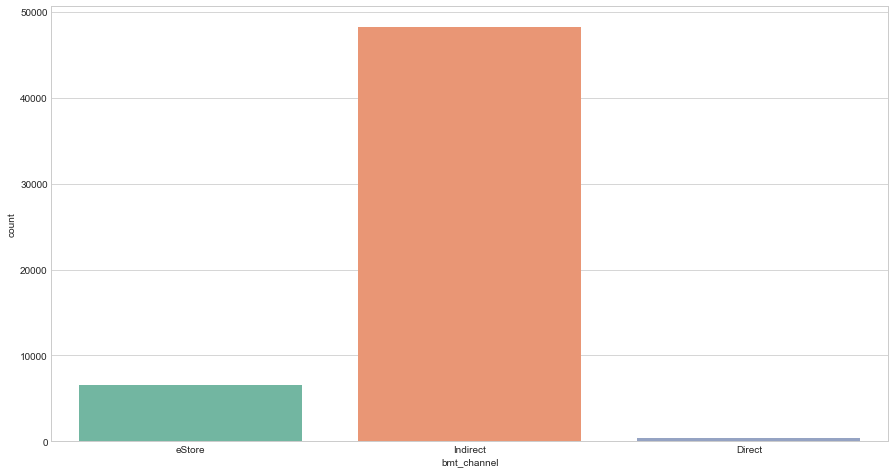

In [7]:
fig,axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="bmt_channel",palette="Set2", data=df, ax=axis1)

In [8]:
%%opts BoxWhisker [width=600 height=400] 

hv.BoxWhisker(df, kdims=['bmt_channel'], vdims=['onboarding_score'])

:BoxWhisker   [bmt_channel]   (onboarding_score)

eStore orders have higher Onborading Score

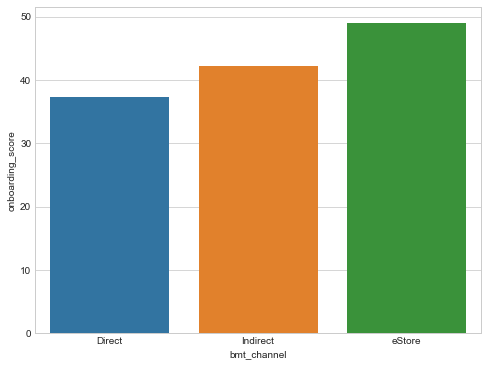

In [9]:
fig, axis1 = plt.subplots(1,1,figsize=(8,6))
avg_sc = df[["bmt_channel",'order_type', "onboarding_score"]].groupby(['bmt_channel'],as_index=False).mean()
sns.barplot(x="bmt_channel", y="onboarding_score", data=avg_sc)

### by Order Type

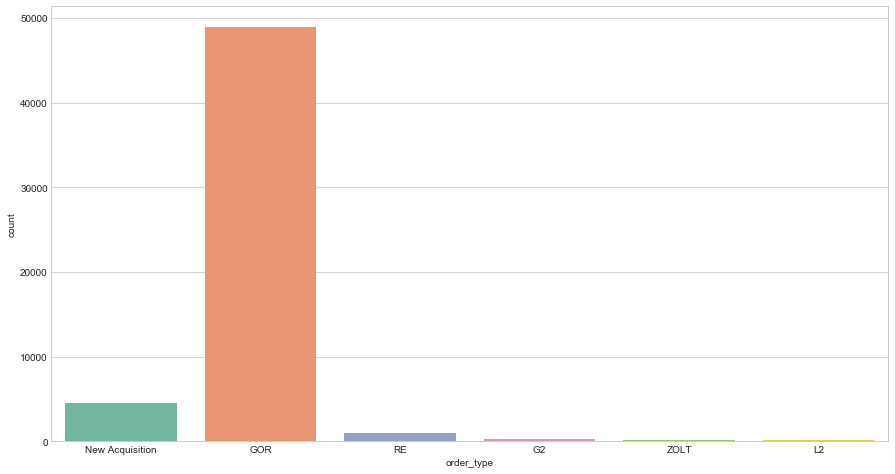

In [10]:
fig,axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="order_type",palette="Set2", data=df, ax=axis1)

In [11]:
%%opts BoxWhisker [width=600 height=400] 

hv.BoxWhisker(df, kdims=['order_type'], vdims=['onboarding_score'])

:BoxWhisker   [order_type]   (onboarding_score)

ZOLT, New Acq. have higher score

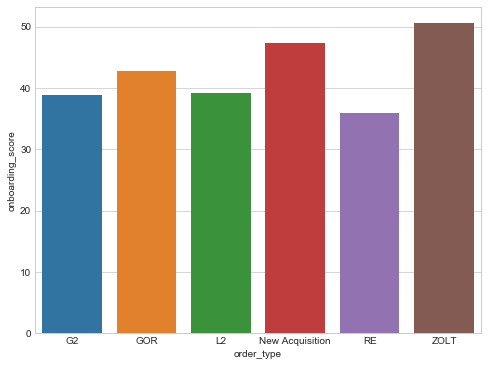

In [12]:
fig, axis1 = plt.subplots(1,1,figsize=(8,6))
avg_sc = df[["bmt_channel",'order_type', "onboarding_score"]].groupby(['order_type'],as_index=False).mean()
sns.barplot(x="order_type", y="onboarding_score", data=avg_sc)

### Count by Order Type & Channel

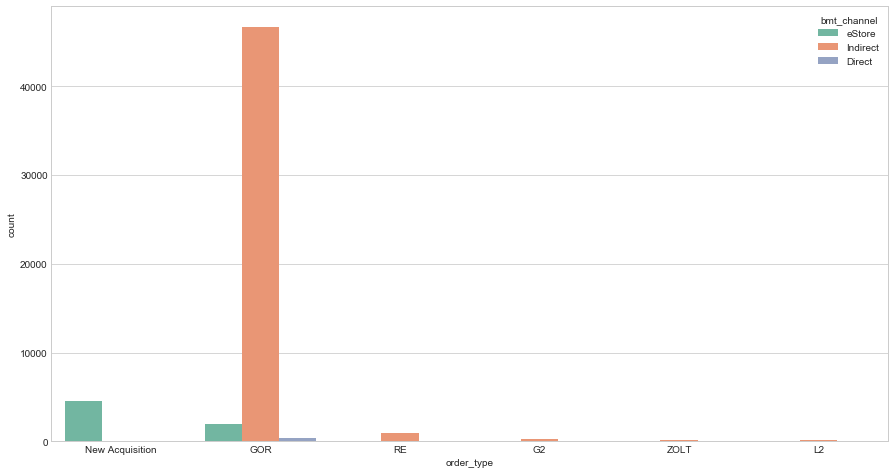

In [13]:
fig,axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="order_type",hue= 'bmt_channel',palette="Set2", data=df, ax=axis1)

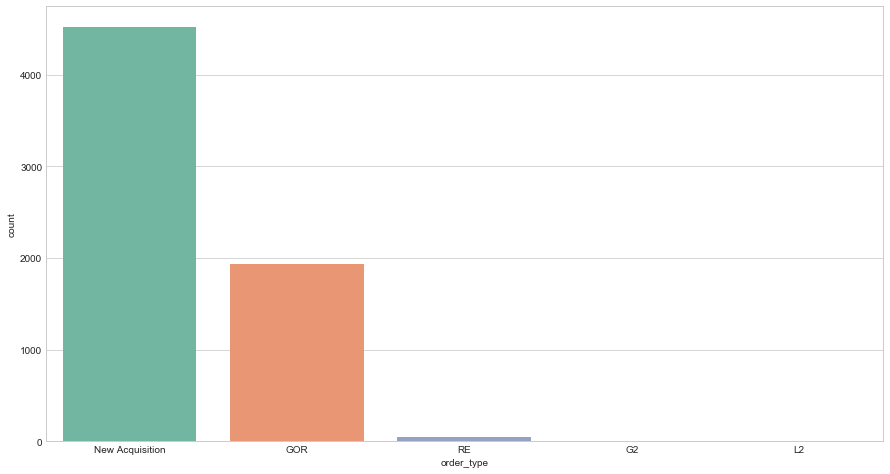

In [14]:
fig,axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="order_type",palette="Set2", data=df[(df['bmt_channel'] == "eStore")], ax=axis1)


### by Channel Partner

In [15]:
%%opts BoxWhisker [width=600 height=400] 

hv.BoxWhisker(df, kdims=['channel_partner_type'], vdims=['onboarding_score'])

:BoxWhisker   [channel_partner_type]   (onboarding_score)

Discributor, ISV Bundle have higher Score

# Car Percentage & Segmentation

In [16]:
print ('Average Car Percentage is ',df["car_pct_days_used_since_agreement_start"].mean())

Average Car Percentage is  0.25694055676688493


In [17]:
%%opts Distribution [width=600 height=400]

hv.Distribution(df, 'car_pct_days_used_since_agreement_start')

:Distribution   [car_pct_days_used_since_agreement_start]   (Density)

### by Channel

In [18]:
%%opts BoxWhisker [width=600 height=400] 

hv.BoxWhisker(df, kdims=['bmt_channel'], vdims=['car_pct_days_used_since_agreement_start'])

:BoxWhisker   [bmt_channel]   (car_pct_days_used_since_agreement_start)

Indirect has higher pct_used

### by Order Type

In [19]:
%%opts BoxWhisker [width=600 height=400] 

hv.BoxWhisker(df, kdims=['order_type'], vdims=['car_pct_days_used_since_agreement_start'])

:BoxWhisker   [order_type]   (car_pct_days_used_since_agreement_start)

GOR has higher pct_used

### by Channel Partner

In [20]:
%%opts BoxWhisker [width=600 height=400] 

hv.BoxWhisker(df, kdims=['channel_partner_type'], vdims=['car_pct_days_used_since_agreement_start'])

:BoxWhisker   [channel_partner_type]   (car_pct_days_used_since_agreement_start)

Distributor, ISV Bundle have higher pct_used

In [21]:

subset1 = df[['car_pct_days_used_since_agreement_start','current_segment','onboarding_score','month_since_agreement_start']]
dfhv1 = hv.Dataset(subset1,['month_since_agreement_start'])

In [33]:
%opts Scatter [width=800 height=400 show_grid=True size_index=2](alpha=0.6)(color=Palette('Category20') size=5)
%opts NdOverlay [legend_position='left']

dfhv1.to(hv.Scatter, 'month_since_agreement_start', ['car_pct_days_used_since_agreement_start', 'onboarding_score']).overlay()


:NdOverlay   [current_segment]
   :Scatter   [month_since_agreement_start]   (car_pct_days_used_since_agreement_start,onboarding_score)

### Car_pct by Industry & Size

In [23]:
df['month_since_agreement_start'] = df['month_since_agreement_start'].round(0)
subset2 =df[['hier_industry_segment_name', 'customer_size_code', 'deployment',
             'geo_cd','current_segment','car_pct_days_used_since_agreement_start',
             'month_since_agreement_start']]

dfhv2=hv.Dataset(subset2, ['hier_industry_segment_name','geo_cd'])


In [24]:
%opts HeatMap[ width=800 height=600 xrotation=45 tools=['hover']]
dfhv2.to(hv.HeatMap,['customer_size_code','hier_industry_segment_name'],'car_pct_days_used_since_agreement_start')

:HoloMap   [geo_cd]
   :HeatMap   [customer_size_code,hier_industry_segment_name]   (car_pct_days_used_since_agreement_start)

high Car_pct:

APCA: VSB: Other, Construction, Architecture, Mining 
      
      SMB: Film&TV, Buildings
      
      ENT：Auto & Trans, Architecture, Building Products
      
Americas: VSB: Auto, Mining

          SMB: Unknown, Architecture
          
          ENT: Civil Infra., Utilities& Telecom
          
EMEA : VSB: Film&TV, Building Products

       SMB: Buildings, Auto & Trans, Architecture
       
       ENT: Auto & Trans, Construction


# Current Segment

### by Channel & Order Type

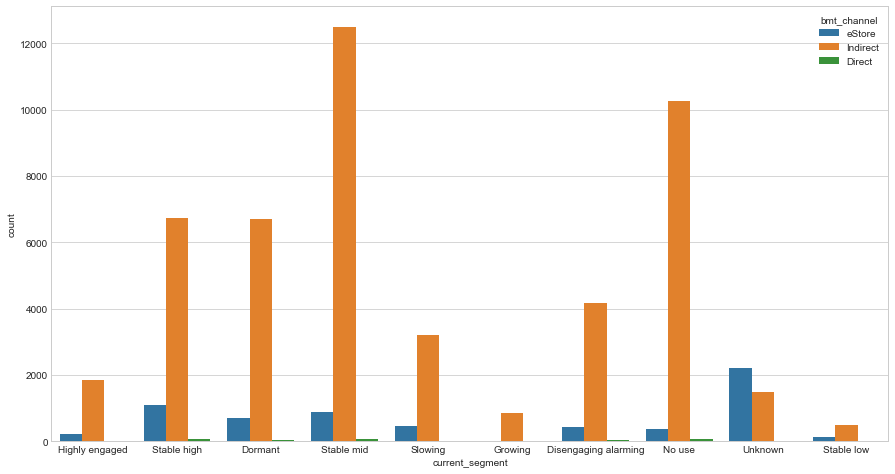

In [25]:
fig,axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="current_segment",hue= 'bmt_channel', data=df, ax=axis1)

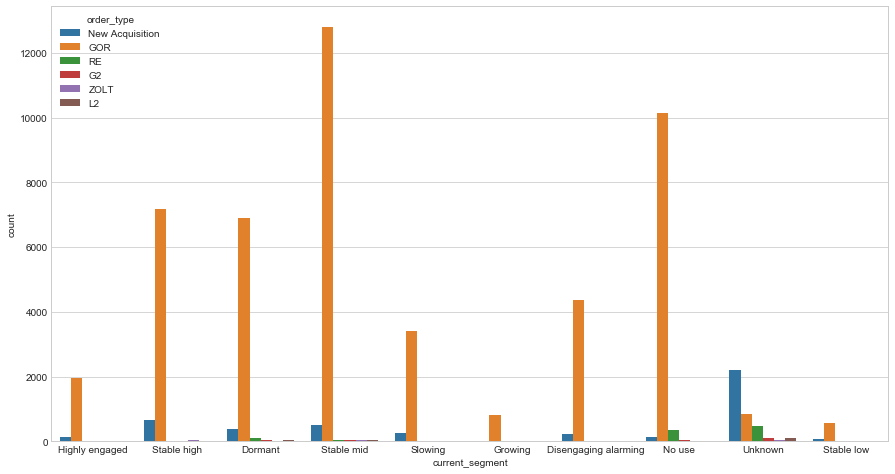

In [26]:
fig,axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="current_segment",hue= 'order_type', data=df, ax=axis1)

### by Industry & Geo

In [27]:
%opts HeatMap[ width=800 height=600 xrotation=45 tools=['hover']]
dfhv2.to(hv.HeatMap,['hier_industry_segment_name','current_segment'],'car_pct_days_used_since_agreement_start')

:HoloMap   [geo_cd]
   :HeatMap   [hier_industry_segment_name,current_segment]   (car_pct_days_used_since_agreement_start)

# Order date

Text(0.5,1,'Order Created')

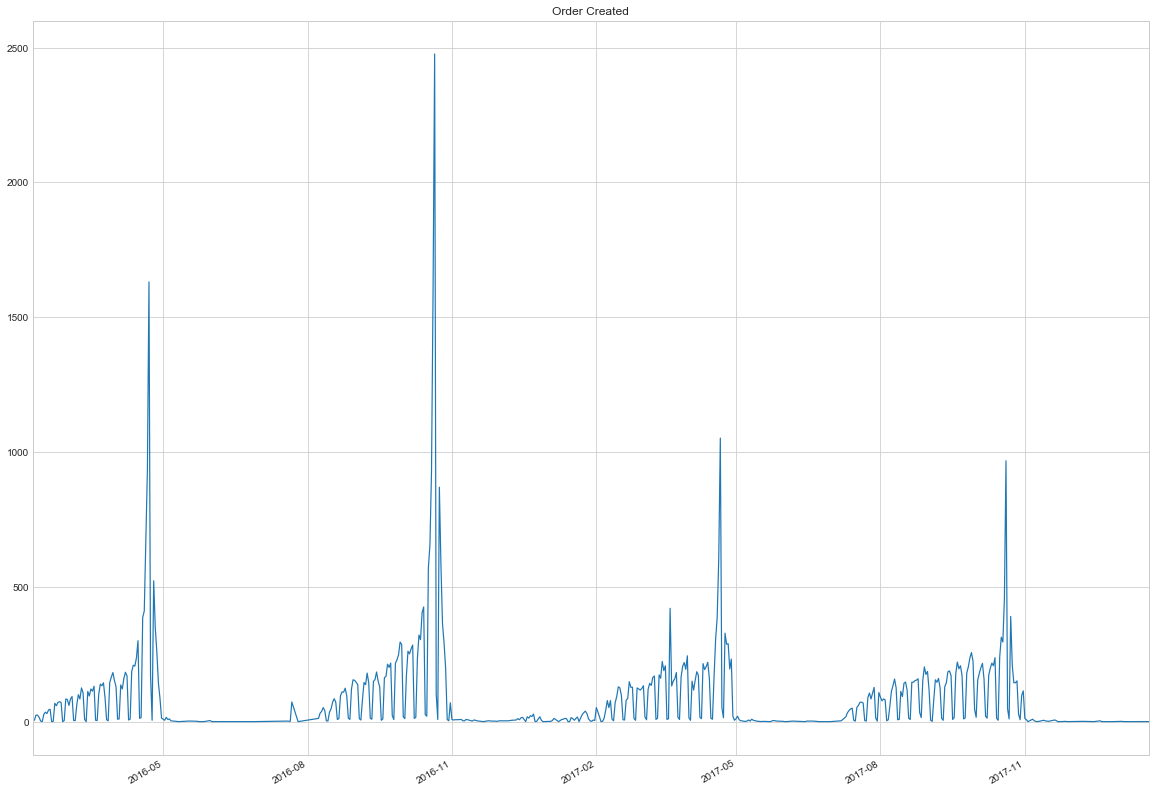

In [28]:

fig, axis1 = plt.subplots(1,1,figsize=(20,15))

df['order_date'] = pd.to_datetime(df['order_date'])
df['order_date'].value_counts().plot(kind='line', linewidth=1.2).set_title('Order Created')